# Prevendo Preço de Ações com Deep Learning (LSTM)

# Baixando os dados do o Yahoo Finance com uso de biblioteca

```  
!pip install yfinance
!pip install pandas
!pip install numpy
!pip install matplotlib
```

Aqui você instala o yfinance, nossa library que chama os dados via API para os dados do Yahoo! Finance.

Agora bora importar algumas coisinhas. O yfinance que vamos usar já e os super básicos pandas, numpy e matplotlib.pyplot. Minha recomendação é sempre carregar esses três últimos sempre.

In [317]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Agora que temos o que precisamos, vamos puxar as informações da ação que queremos analisar.

# Vamos definir somente duas variaveis 

titulo = 'VALE' # o papel a ser coletados os dados

periodo = '5y'  # o periodo ao qual os dados vao ser coletados.

In [318]:
#definindo variaveis

titulo = 'MSFT34.SA'
titulo = 'PETR3.SA'
titulo = 'AAPL34.SA'#bom resultado
titulo = 'AGRO3.SA'#MARROMENTO
titulo =  'EGIE3.SA'
titulo =  'GGBR4.SA'#bom resultado
titulo = 'ITUB4.SA'#usar 10 dias regressor


periodo = '5y' 
#Criando o data frame com os dados de saida.
stock = pd.DataFrame(yf.Ticker(titulo).history(period = periodo))
stock[1:4]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-11-01 00:00:00-03:00,27.321458,27.619511,26.951653,27.564314,22692000,0.01,0.0
2018-11-05 00:00:00-02:00,27.597429,27.889961,27.464961,27.862364,25894650,0.00,0.0
2018-11-06 00:00:00-02:00,27.448390,28.038975,27.431831,28.038975,24220050,0.00,0.0


# O resultado de saida da biblioteca yfinance é um DF.

Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []

In [319]:
#mostrando DF
stock


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-10-31 00:00:00-03:00,27.589016,27.737997,26.606848,27.175180,24243150,0.00,0.0
2018-11-01 00:00:00-03:00,27.321458,27.619511,26.951653,27.564314,22692000,0.01,0.0
2018-11-05 00:00:00-02:00,27.597429,27.889961,27.464961,27.862364,25894650,0.00,0.0
2018-11-06 00:00:00-02:00,27.448390,28.038975,27.431831,28.038975,24220050,0.00,0.0
2018-11-07 00:00:00-02:00,28.127293,28.331517,27.602944,28.066582,23278050,0.00,0.0
...,...,...,...,...,...,...,...
2023-10-25 00:00:00-03:00,27.049999,27.830000,26.969999,27.040001,25565100,0.00,0.0
2023-10-26 00:00:00-03:00,27.200001,27.820000,27.090000,27.709999,28766600,0.00,0.0
2023-10-27 00:00:00-03:00,27.840000,27.900000,27.190001,27.299999,30176000,0.00,0.0


# Sobre o modelo que usaremos: LSTM, Long -Short Term Memory.
A LSTM é basicamente um tipo especial de Rede Neural.

A Rede Neural é basicamente uma imitação de cérebro, processando dados em camadas.

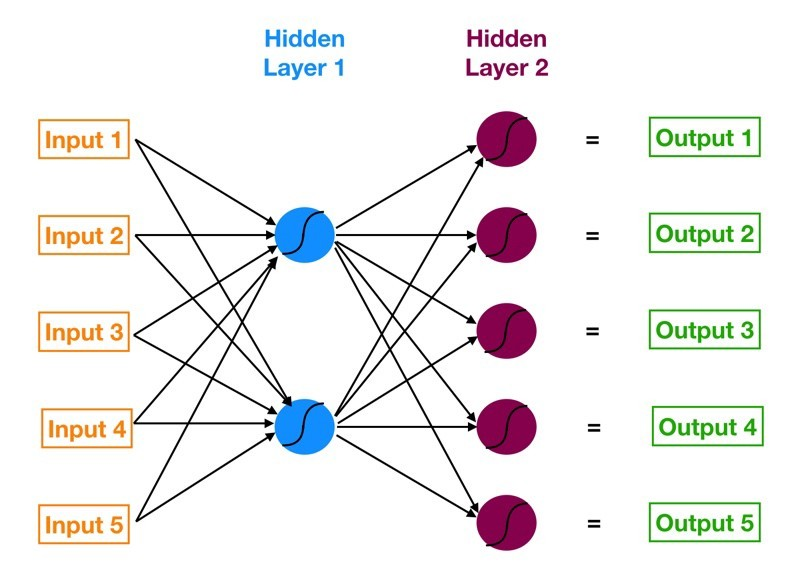

Basicamente falando, a rede neural busca a melhor solução a partir de calculo de tentativas, das quais por interpolação vão descobrindo os padrões os quais ela deve seguir para chegar no melhor resultado.

Basicamente falando, você alimenta a rede neural com os dados e processando por tentativas ela vai encontrando soluções a partir de padrões que encontra a cada tentativa.

A LSTM funciona com três filtros:

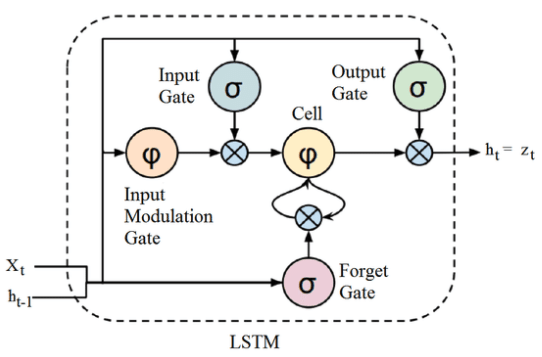

O Forget Gate, ou seja, decide o quanto do passado você deveria lembrar, parece música da Marília Mendonça. Ele decide isso a partir de uma função Sigmóide.

O Input Gate, que a grosso modo separa as informações importantes e decide o quanto entra para o modelo. (Na verdade ela regulada usando a função sigmoide que filtra os valores a serem lembrados de forma similar ao forget gate usando as entradas h_t-1 e x_t. Então, um vetor é criado usando a função tanh que dá saída de -1 a +1, que contém todos os valores possíveis de h_t-1 e x_t. Os valores do vetor e os valores regulados são multiplicados para obter as informações úteis). Mas é tipo o "segurança" na entrada da balada.

O Output Gate, ao final, decide quanto da informação da input cell ele vai considerar como um padrão relevante do modelo. É o olheiro que seleciona esportistas.
Podemos pensar assim também:

Um modelo de três passos que avalia a cada passo a relevância da memória de longo prazo para prever o curto prazo. A informação relevante é mantida e a irrelevante, descartada.

Com esse básico do básico do básico vamos para o modelo.

# Importando bibliotecas de ML

``` 
!python.exe -m pip install --upgrade pip

pip install scikit-learn
pip install tensorflow[and-cuda]
pip install keras

```

Keras é derivado do TensorFLow e so funciona no python3.11 logo ha que instalar 


In [320]:
#Importando as libraries

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Agora vamos criar o DataFrame, com um passo um pouco diferente que vou mostrar por que mais adiante:

In [321]:
#Cria-se um novo DF com indices de 0 - numero total de linhas do DF stock
# O DF recebe somente duas colunas do DF stock, as colunas Date (index) e Close

stock_close = pd.DataFrame(stock['Close'],columns=['Close'])

# stock_close = stock_close.values


# Normalizando os dados entre 0 e 1.

Agora uma prática importante. Quando temos uma série com alta variabilidade, como no caso de ações, é sempre importante que criemos uma transformação para suavizar as variações em escala absoluta, mas mantendo as propriedades dos dados. A forma clássica de fazer isso é usando logaritmo .

Mas aqui vamos usar um scaling que funciona de maneira análoga, normalizando os dados entre 0 e 1. Para isso vamos criar a seguinte função:

In [322]:
scala = MinMaxScaler(feature_range=(0,1))
stock_close_scalado = scala.fit_transform(stock_close)


Separando em Variaveis de Teste e Variaveis de Treino.

Define quantos dias vamos tentar prever com o modelo. No caso sera de 60 dias.


In [323]:
#aqui vamos separa as observacoes em duas partes vamos tentar prever os ultimos 60 dias

dias_a_prever = 30

stock_close_treino = stock_close[0:(len(stock.index)-dias_a_prever)]

stock_close_teste = stock_close[(len(stock.index)-dias_a_prever):]




# Criando um autorregressor.

Aqui se cria um train set que olha 90 dias para trás para realizar a previsão do que acontecerá em cada um dos dias.

Em resumo ele calcula o dia com base nos valores dos 90 dias anteriores.


In [324]:
dias_regressor = 10
#aqui se criam duas listas vazias que vao receber os valores

x_train, y_train = [], []

for i in range(dias_regressor,len(stock_close_treino)):

    x_train.append(stock_close_scalado[i-dias_regressor:i,0])

    y_train.append(stock_close_scalado[i,0])
    
#x train é um array com o comjunto numero equivalente a regressor de observacoes por linha
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


# Criando o Modelo


In [325]:
model = Sequential()
units_do_modelo = 100
model.add(LSTM(units=units_do_modelo, return_sequences=True, input_shape=(dias_regressor,1)))

model.add(LSTM(units=1))

#As units são as unidades de memória, como "repositórios de memória" (células) você colocará para passar os filtros.

Aqui colocamos a loss function, que é a função de minimização. Isso quer dizer que eu quero minimizar o Erro Quadrático Médio (EQM), ou seja, o quanto a minha previsão desvia-se do real.

O otimizador é chamado Adam, ou estimador de momentos adaptativo.

In [326]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x=x_train, y=y_train, epochs=4, batch_size=1, verbose=2)

Epoch 1/4
1200/1200 - 6s - loss: 0.0089 - 6s/epoch - 5ms/step
Epoch 2/4
1200/1200 - 4s - loss: 0.0048 - 4s/epoch - 3ms/step
Epoch 3/4
1200/1200 - 4s - loss: 0.0033 - 4s/epoch - 3ms/step
Epoch 4/4
1200/1200 - 4s - loss: 0.0024 - 4s/epoch - 3ms/step


In [327]:
#Prevendo os 143 últimos preços de ação, baseado nos 90 últimos.
# newdata = stock_close
# valid = stock_close_teste


#inputs recebe os valores de stock close com o numero de dias antes da quantidade definida para testes... OU seja dias de teste + regressor
inputs = stock_close[len(stock_close) - len(stock_close_teste) - dias_regressor:]
inputs  = scala.transform(inputs)
# inputs = inputs.reshape(-1,1)


X_test = []
for i in range(dias_regressor,inputs.shape[0]): # de 90 a 150
    X_test.append(inputs[i-dias_regressor:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


closing_price = model.predict(x=X_test)



1/1 [==============================] - 1s 1s/step


E agora revertendo o scaling que fizemos no início para voltar aos preços reais da ação.


In [328]:
closing_price = scala.inverse_transform(closing_price)

2023-09-21 00:00:00-03:00
2023-09-22 00:00:00-03:00


C:\Users\b_lin\AppData\Local\Temp\ipykernel_7432\193299420.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_close_teste['Predictions'] = closing_price


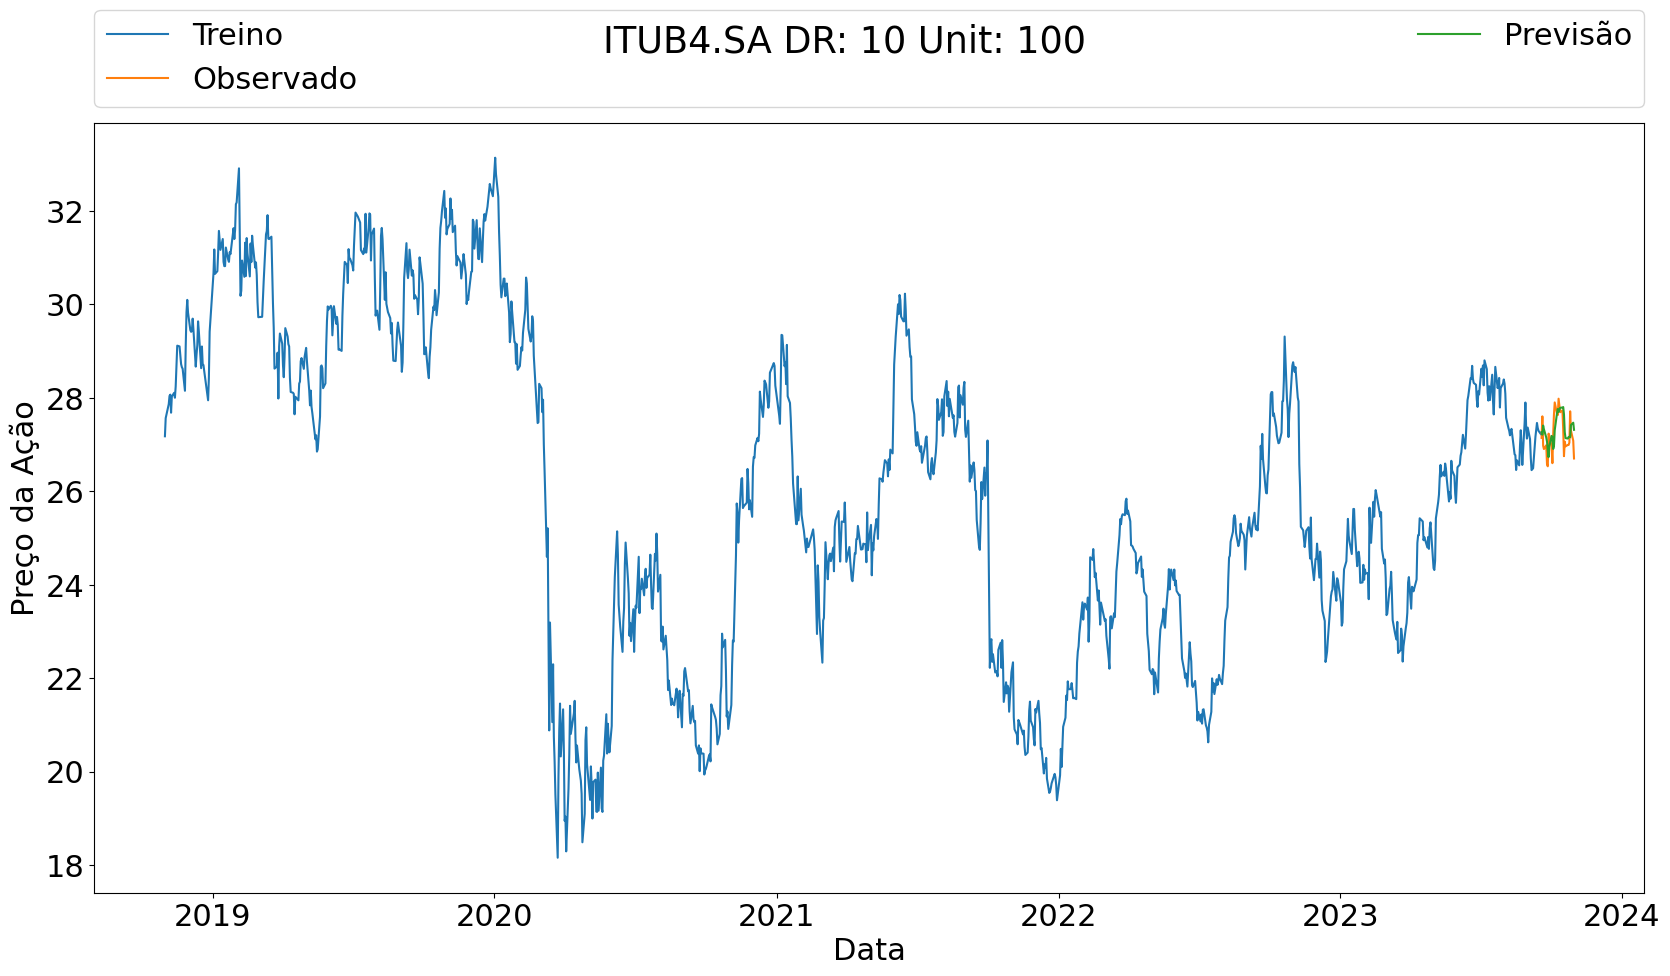

In [329]:

#Visualizando a Previsão
# train = stock_close_treino

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))

# t_2020 = train['2020']

stock_close_teste['Predictions'] = closing_price

plt.ylabel('Preço da Ação')
plt.xlabel('Data')
plt.suptitle(titulo + ' DR: ' + str(dias_regressor) + ' Unit: ' + str(units_do_modelo))
plt.plot(stock_close_treino['Close'], label = "Treino")
plt.plot(stock_close_teste['Close'], label = 'Observado')
plt.plot(stock_close_teste['Predictions'], label = 'Previsão')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

dia = stock_close_teste.index[2]
print(dia)
print(dia + pd.Timedelta(1, unit='d'))


# Descobrindo o valor do dia seguinte

In [330]:
#definindo a data
data_dia_seguinte = stock_close.index[len(stock_close.index)-1] + pd.Timedelta(1, unit='d')
print(f'Realizaremos a previsao do dia: {data_dia_seguinte}...')

# Pegar dos dados inciais os ultimios valores de acordo com a variavel de n regressores.
print(f'Coletando as ultimas observacoes dos {dias_regressor} ultimos dias...')
previsao_dia_seg = stock_close[len(stock_close)-dias_regressor:len(stock_close)]
#escalar os dados... de retorno a funcao retornar um array
previsao_dia_seg = scala.transform(previsao_dia_seg)
#transforma o array em uma linha com varios valores.
previsao_dia_seg = previsao_dia_seg.reshape(1,-1)
#transorma os dados no formato que deve ser inserido no model
previsao_dia_seg = np.reshape(previsao_dia_seg, (previsao_dia_seg.shape[0],previsao_dia_seg.shape[1],1))
# prevendo o valor
valor_previsto = model.predict(previsao_dia_seg)
#retornando a escalo normal
valor_previsto = scala.inverse_transform(valor_previsto)
print(f'O vlaor previsto para o dia {data_dia_seguinte} é : {valor_previsto[0][0]}')


Realizaremos a previsao do dia: 2023-11-01 00:00:00-03:00...
Coletando as ultimas observacoes dos 10 ultimos dias...
1/1 [==============================] - 0s 21ms/step
O vlaor previsto para o dia 2023-11-01 00:00:00-03:00 é : 27.00174903869629


# Plotando a previsao...

O valor de fechamento previsto para o dia 2023-11-01 00:00:00-03:00 é de : 27.00174903869629
Uma variação de -1.1444780975580215 %


C:\Users\b_lin\AppData\Local\Temp\ipykernel_7432\2268838514.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stock_close_teste = pd.concat([stock_close_teste,df_previsto] )


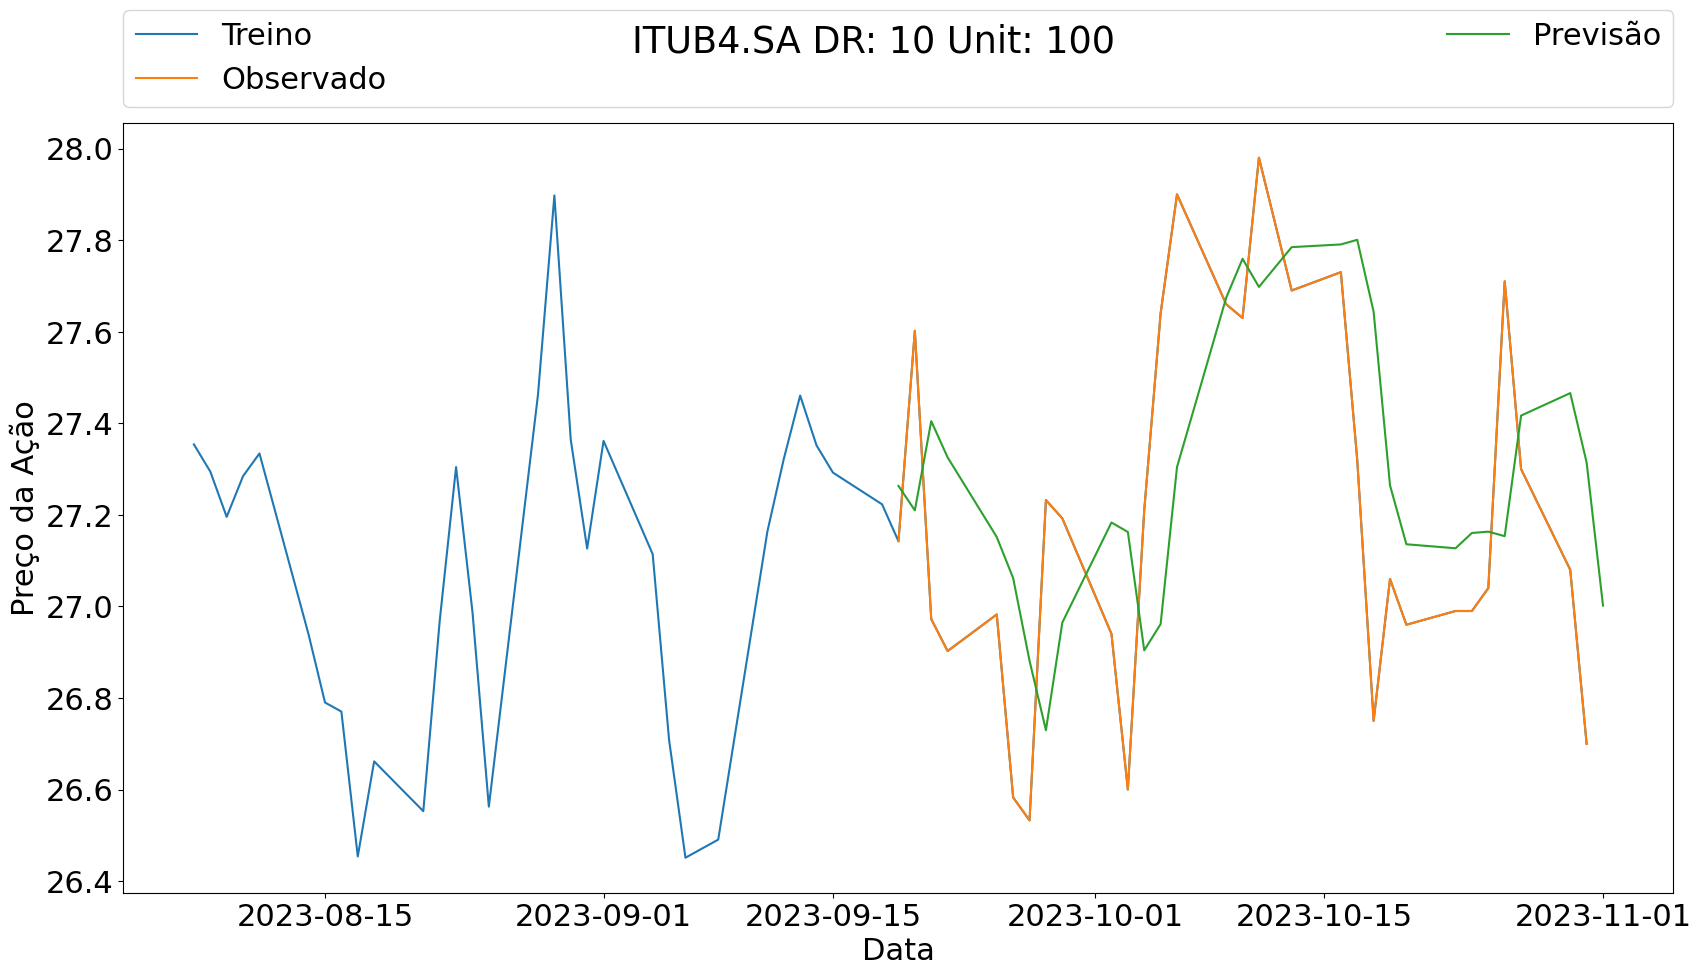

In [331]:
#Visualizando a Previsão

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))

#criando um DF com os dados gerados


df_previsto = pd.DataFrame([[None, valor_previsto[0][0]]], columns=['Close','Predictions'], index=[data_dia_seguinte])

#concatenando os dados 

stock_close_teste = pd.concat([stock_close_teste,df_previsto] )

plt.ylabel('Preço da Ação')
plt.xlabel('Data')
plt.suptitle(titulo + ' DR: ' + str(dias_regressor) + ' Unit: ' + str(units_do_modelo))
# plt.plot(stock_close_treino['Close'], label = "Treino")
plt.plot(stock_close.tail(dias_a_prever*2)['Close'], label = "Treino")
plt.plot(stock_close_teste['Close'], label = 'Observado')
plt.plot(stock_close_teste['Predictions'], label = 'Previsão')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)



print(f'O valor de fechamento previsto para o dia {data_dia_seguinte} é de : {valor_previsto[0][0]}')
#valor previsto de hoje - valor de ontem / valor de ontem
print(f'Uma variação de { ((stock_close_teste.tail(2)["Predictions"].values[1] - stock_close_teste.tail(2)["Predictions"].values[0] ) / stock_close_teste.tail(2)["Predictions"].values[0])*100 } %')




In [332]:
print(stock_close_teste.tail(3))


                               Close  Predictions
2023-10-30 00:00:00-03:00  27.080000    27.465931
2023-10-31 00:00:00-03:00  26.700001    27.314356
2023-11-01 00:00:00-03:00        NaN    27.001749


6. Conclusão.
Bom, primeiro queria dizer que ninguém que votou ali na poll é meu amigo (risos)! Afinal, as demais opções (GARCH e Monte Carlo) são modelos mais padrão, largamente utilizados para precificar ativos!

A rede neural LSTM realmente performa bem para esse tipo de previsão, que depende, claro, de vários outros fatores além de seu próprio preço, como eventos de mercado presentes em notícias, fusões, aquisições, demonstração de resultados e por aí vai.

Vale lembrar que usar o modelo para colocar seu dinheirinho vai por sua conta e risco! Principalmente porque os modelos de rede neural têm uma grande desvantagem: são modelos caixa preta, ou seja, funcionam mas não são facilmente explicáveis nem mesmo auditáveis.

Mais uma vez expliquei bem por cima alguns conceitos, muita piada sem graça para deixar mais leve e no final, chegamos a uma previsão.

Para alterar qual ação você quer olhar, a única coisa que precisa ser mudada no código é o Ticker da ação, lá em cima. Se tiver alguma dúvida ou problema, sugiro pesquisar a ação que você quer e olhar no Yahoo! Finance. Das primeiras vezes, eu tentei MGLU3 (Magazine Luiza) sem o .SA e isso não me retornava nada.

E claro, como sempre: Feedbacks muito bem vindos! Qualquer dúvida, sugestão, crítica (construtiva), me chama que conversamos!

Um Grande Abraço!

